# Cultural Spaces in the city of Buenos Aires - Code

### Libraries

In [58]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

### Getting data

In [67]:
# https://data.buenosaires.gob.ar/dataset/espacios-culturales
cultural_spaces = pd.read_csv("espacios-culturales.csv")
cultural_spaces_clean = cultural_spaces[['FUNCION_PR',"ESTABLECIM",'LATITUD', 'LONGITUD', 'BARRIO']]

dic_venue_translations = {"BIBLIOTECA": "Library",
    "LIBRERIA":"Bookshop",
    "ESPACIO ESCENICO":"Theater Space",
    "ESPACIO DE EXHIBICION":"Exhibition Space",
    "CENTRO CULTURAL":"Cultural Center",
    "MONUMENTOS Y LUGARES HISTORICOS":"Monuments and Historical Sites",
    "BAR":"Bar",
    "ESPACIO DE FORMACION":"Comprehensive Training Space",
    "DISQUERIA":"Record Store",
    "CALESITA":"Carousel",
    "ESPACIO FERIAL":"Carnival",
    "SALA DE CINE":"Cinema"}
for value,i in zip(cultural_spaces_clean["FUNCION_PR"],range(3200)):
    translation = dic_venue_translations[value]
    cultural_spaces_clean.at[i,"FUNCION_PR"] = translation

venues_each_neighborhood = cultural_spaces_clean.groupby('BARRIO')['FUNCION_PR'].value_counts()
venues_each_neighborhood


BARRIO         FUNCION_PR                  
AGRONOMIA      Cultural Center                 4
               Library                         4
               Bar                             2
               Bookshop                        1
               Exhibition Space                1
                                              ..
VILLA URQUIZA  Theater Space                   3
               Library                         2
               Carousel                        1
               Comprehensive Training Space    1
               Record Store                    1
Name: FUNCION_PR, Length: 383, dtype: int64

In [54]:
cultural_spaces.head()
cultural_spaces["FUNCION_PR"].value_counts()

BIBLIOTECA                         619
LIBRERIA                           603
ESPACIO ESCENICO                   388
ESPACIO DE EXHIBICION              345
CENTRO CULTURAL                    319
MONUMENTOS Y LUGARES HISTORICOS    305
BAR                                251
ESPACIO DE FORMACION               197
DISQUERIA                           62
CALESITA                            49
ESPACIO FERIAL                      39
SALA DE CINE                        22
Name: FUNCION_PR, dtype: int64

In [55]:
cultural_spaces["SUBCATEGOR"].value_counts()

SALA DE TEATRO                          276
UNIVERSITARIA Y/O CIENTIFICO TECNICA    258
MUSEO                                   176
GALERIA DE ARTE                         167
ESPECIALIZADA GUBERNAMENTAL             153
CULTURAL                                 97
NOTABLE                                  85
MILONGA Y/O TANGUERIA                    65
POPULAR                                  61
CLUB DE MUSICA EN VIVO                   45
CENTRO CULTURAL DEL PCB                  35
ESPECIALIZADA EMPRESARIAL                33
DGLB-GCBA                                30
ANFITEATRO                               27
ESCOLAR                                  27
OTROS                                    23
MANUALISTAS                              22
TEATRO                                   15
COMUNITARIA Y/O EXTRANJERA               13
ARTISTICA                                12
HISTORICA                                11
SINDICAL                                 10
ARTESANIAS                      

In [56]:
cultural_spaces_clean = cultural_spaces[['FUNCION_PR',"ESTABLECIM",'LATITUD', 'LONGITUD', 'BARRIO']]
cultural_spaces_clean.rename(columns={'ESTABLECIM':'Name',"FUNCION_PR":"Cultural space"})

,Cultural space,Name,LATITUD,LONGITUD,BARRIO
0,BAR,8 ESQUINAS,-34.578517,-58.460137,CHACARITA
1,ESPACIO DE FORMACION,ESCUELA METROPOLITANA DE ARTE DRAMATICA,-34.581638,-58.457072,CHACARITA
2,ESPACIO ESCENICO,GIER MUSIC,-34.578782,-58.456857,CHACARITA
3,MONUMENTOS Y LUGARES HISTORICOS,BOVEDA QUE GUARDA LOS RESTOS DE CARLOS GARDEL,-34.587230,-58.455850,CHACARITA
4,MONUMENTOS Y LUGARES HISTORICOS,ARCHIVO HISTORICO DEL CREMATORIO MUNICIPAL,-34.587230,-58.455850,CHACARITA
...,...,...,...,...,...
3194,ESPACIO ESCENICO,"LAS HERAS, JUAN GREGORIO de, GRAL.",-34.585019,-58.408170,PALERMO
3195,ESPACIO ESCENICO,"SEEBER, FRANCISCO, Intendente",-34.575201,-58.418913,PALERMO
3196,ESPACIO ESCENICO,DONADO 1726,-34.576080,-58.472142,VILLA ORTUZAR
3197,ESPACIO ESCENICO,PLAZA MARIANO BOEDO,-34.622189,-58.412589,BOEDO


In [70]:
types_cultural_spaces=cultural_spaces_clean["FUNCION_PR"].value_counts().to_frame()
types_cultural_spaces.reset_index(inplace=True)
types_cultural_spaces.rename(columns={'index':'TYPE',"FUNCION_PR":"number_cultural_spaces"},inplace=True)
types_cultural_spaces

,TYPE,number_cultural_spaces
0,Library,619
1,Bookshop,603
2,Theater Space,388
3,Exhibition Space,345
4,Cultural Center,319
5,Monuments and Historical Sites,305
6,Bar,251
7,Comprehensive Training Space,197
8,Record Store,62
9,Carousel,49


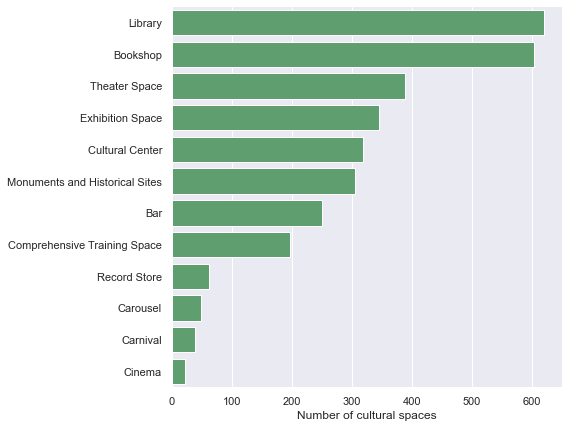

In [71]:
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="number_cultural_spaces",y="TYPE",data=types_cultural_spaces,color="g")
# legend
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 650), ylabel="",
       xlabel="Number of cultural spaces")
sns.despine(left=True, bottom=True)
plt.savefig('svm_conf.png',bbox_inches='tight', dpi=400)

In [72]:
barrios_cultural_spaces=cultural_spaces_clean.groupby('BARRIO')['FUNCION_PR'].count().to_frame()
barrios_cultural_spaces.reset_index(inplace=True)
barrios_cultural_spaces.rename(columns={'BARRIO':'neighborhood',"FUNCION_PR":"number_cultural_spaces"},inplace=True)
barrios_cultural_spaces.head()

,neighborhood,number_cultural_spaces
0,AGRONOMIA,12
1,ALMAGRO,157
2,BALVANERA,254
3,BARRACAS,52
4,BELGRANO,113


In [73]:
top_5=barrios_cultural_spaces.sort_values(by=["number_cultural_spaces"],ascending=False).head()
top_5

,neighborhood,number_cultural_spaces
31,SAN NICOLAS,416
27,RECOLETA,360
20,PALERMO,329
2,BALVANERA,254
16,MONSERRAT,247


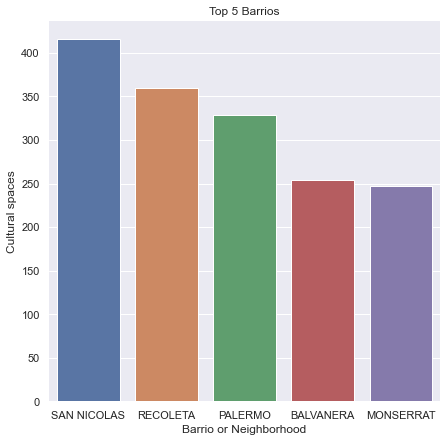

In [74]:
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(y="number_cultural_spaces",x="neighborhood",data=top_5)
ax.set(ylabel="Cultural spaces", xlabel="Barrio or Neighborhood",title="Top 5 Barrios")
sns.despine(left=True, bottom=True)
plt.savefig('svm_conf.png',bbox_inches='tight', dpi=400)

In [75]:
venues_each_neighborhood = cultural_spaces_clean.groupby('BARRIO')['FUNCION_PR'].value_counts()
venues_each_neighborhood.to_frame().columns #se tiene que reemplzar el nombre de una columna para evitar error con el indice del mismo nombre
distro_data=venues_each_neighborhood.to_frame().rename(columns={"FUNCION_PR":"cantidad"})
distro_data.reset_index(inplace=True)
distro_data

,BARRIO,FUNCION_PR,cantidad
0,AGRONOMIA,Cultural Center,4
1,AGRONOMIA,Library,4
2,AGRONOMIA,Bar,2
3,AGRONOMIA,Bookshop,1
4,AGRONOMIA,Exhibition Space,1
...,...,...,...
378,VILLA URQUIZA,Theater Space,3
379,VILLA URQUIZA,Library,2
380,VILLA URQUIZA,Carousel,1
381,VILLA URQUIZA,Comprehensive Training Space,1


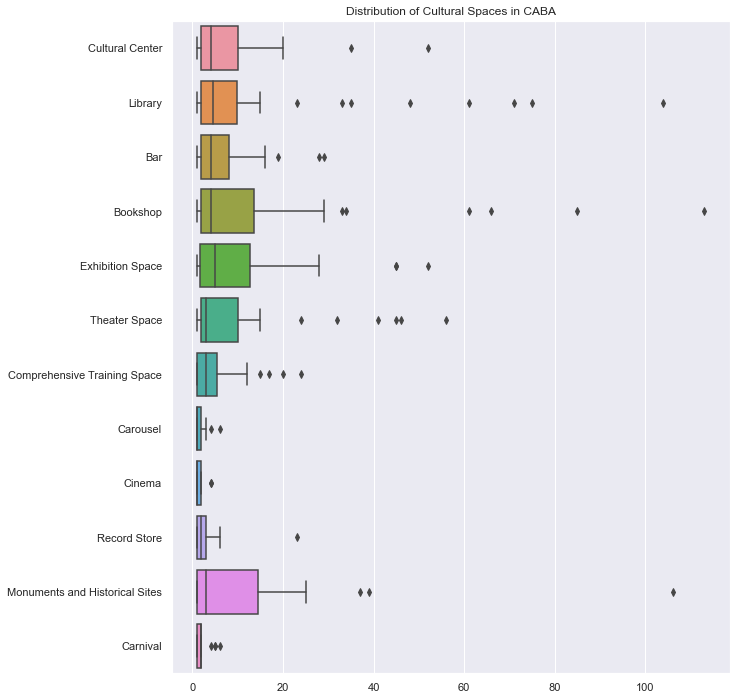

In [76]:
f, ax = plt.subplots(figsize=(10, 12))
ax = sns.boxplot(y="FUNCION_PR",x="cantidad",data=distro_data,orient="h")
ax.set(ylabel="", xlabel="",title="Distribution of Cultural Spaces in CABA")
plt.savefig('svm_conf.png',bbox_inches='tight', dpi=400)

In [77]:
distro_data.sort_values(by=["cantidad"],ascending=False).head(10)

,BARRIO,FUNCION_PR,cantidad
276,SAN NICOLAS,Bookshop,113
233,RECOLETA,Monuments and Historical Sites,106
277,SAN NICOLAS,Library,104
234,RECOLETA,Bookshop,85
140,MONSERRAT,Library,75
235,RECOLETA,Library,71
15,BALVANERA,Bookshop,66
175,PALERMO,Bookshop,61
16,BALVANERA,Library,61
176,PALERMO,Theater Space,56


In [78]:
# one hot encoding
caba_onehot = pd.get_dummies(cultural_spaces_clean[cultural_spaces_clean[["FUNCION_PR"]] != "DummySTR"]["FUNCION_PR"], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
caba_onehot.insert(loc=0, column="Neighborhood", value=cultural_spaces_clean[['BARRIO']].values)
caba_onehot.shape
caba_onehot.head()

,Neighborhood,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space
0,CHACARITA,1,0,0,0,0,0,0,0,0,0,0,0
1,CHACARITA,0,0,0,0,0,1,0,0,0,0,0,0
2,CHACARITA,0,0,0,0,0,0,0,0,0,0,0,1
3,CHACARITA,0,0,0,0,0,0,0,0,0,1,0,0
4,CHACARITA,0,0,0,0,0,0,0,0,0,1,0,0


In [80]:
caba_grouped = caba_onehot.groupby('Neighborhood').mean().reset_index()
caba_grouped_num_cc=caba_onehot.groupby('Neighborhood').sum().reset_index()
caba_grouped_num_cc.head(10)

,Neighborhood,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space
0,AGRONOMIA,2,1,0,0,0,0,4,1,4,0,0,0
1,ALMAGRO,13,22,0,1,1,20,35,5,13,0,1,46
2,BALVANERA,15,66,0,2,2,17,20,15,61,13,2,41
3,BARRACAS,4,4,0,2,0,6,10,4,10,8,0,4
4,BELGRANO,3,34,2,2,4,9,2,10,33,3,5,6
5,BOCA,9,2,2,0,0,0,5,27,3,6,0,9
6,BOEDO,9,6,0,0,0,1,12,1,4,1,0,7
7,CABALLITO,6,29,5,4,1,9,9,7,23,0,2,12
8,CHACARITA,5,6,1,1,0,2,9,8,4,24,0,15
9,COGHLAN,1,1,0,0,0,0,0,2,2,0,0,2


In [82]:
caba_grouped.head()

,Neighborhood,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space
0,AGRONOMIA,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.333333,0.083333,0.333333,0.000000,0.000000,0.000000
1,ALMAGRO,0.082803,0.140127,0.000000,0.006369,0.006369,0.127389,0.222930,0.031847,0.082803,0.000000,0.006369,0.292994
2,BALVANERA,0.059055,0.259843,0.000000,0.007874,0.007874,0.066929,0.078740,0.059055,0.240157,0.051181,0.007874,0.161417
3,BARRACAS,0.076923,0.076923,0.000000,0.038462,0.000000,0.115385,0.192308,0.076923,0.192308,0.153846,0.000000,0.076923
4,BELGRANO,0.026549,0.300885,0.017699,0.017699,0.035398,0.079646,0.017699,0.088496,0.292035,0.026549,0.044248,0.053097


In [83]:
caba_grouped.describe()

,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.110303,0.157426,0.012613,0.041828,0.005025,0.093721,0.131863,0.085900,0.189518,0.042033,0.016488,0.113282
std,0.099378,0.111148,0.020717,0.077445,0.011982,0.114341,0.107700,0.100115,0.113000,0.071745,0.037207,0.092231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046768,0.082743,0.000000,0.000000,0.000000,0.026937,0.051619,0.000000,0.095898,0.000000,0.000000,0.051588
50%,0.085145,0.139371,0.000000,0.022632,0.000000,0.063698,0.118824,0.061786,0.192928,0.000000,0.000000,0.098583
75%,0.163288,0.242044,0.017834,0.053897,0.004425,0.118386,0.204348,0.115417,0.252717,0.056243,0.018826,0.162730
max,0.400000,0.500000,0.064516,0.500000,0.052632,0.666667,0.444444,0.428571,0.500000,0.320000,0.230769,0.416667


In [85]:
barrios_geo = r'barrios.json' # geojson file

# create a plain world map
address = 'Buenos Aires'
geolocator = Nominatim(user_agent="CABA")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
caba_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [86]:
num_top_venues = 3

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = caba_grouped['Neighborhood']

for ind in np.arange(caba_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(caba_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,AGRONOMIA,Library,Cultural Center,Bar
1,ALMAGRO,Theater Space,Cultural Center,Bookshop
2,BALVANERA,Bookshop,Library,Theater Space
3,BARRACAS,Library,Cultural Center,Monuments and Historical Sites
4,BELGRANO,Bookshop,Library,Exhibition Space
5,BOCA,Exhibition Space,Theater Space,Bar
6,BOEDO,Cultural Center,Bar,Theater Space
7,CABALLITO,Bookshop,Library,Theater Space
8,CHACARITA,Monuments and Historical Sites,Theater Space,Cultural Center
9,COGHLAN,Theater Space,Library,Exhibition Space


In [87]:
describe_neighborhoods=neighborhoods_venues_sorted.describe(include="all")
describe_neighborhoods
describe_neighborhoods.drop("Neighborhood",axis=1)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
count,48,48,48
unique,9,9,8
top,Bookshop,Library,Theater Space
freq,11,16,13


In [88]:
barrios_cultural_spaces_sorted=neighborhoods_venues_sorted.join(barrios_cultural_spaces.set_index("neighborhood"),on="Neighborhood")
barrios_cultural_spaces_sorted.rename(columns={"number_cultural_spaces":"Total cultural spaces"},inplace= True)
barrios_cultural_spaces_sorted.sort_values(by=["Total cultural spaces"],ascending=False).head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Total cultural spaces
31,SAN NICOLAS,Bookshop,Library,Theater Space,416
27,RECOLETA,Monuments and Historical Sites,Bookshop,Library,360
20,PALERMO,Bookshop,Theater Space,Exhibition Space,329
2,BALVANERA,Bookshop,Library,Theater Space,254
16,MONSERRAT,Library,Monuments and Historical Sites,Bar,247
28,RETIRO,Library,Exhibition Space,Bookshop,170
1,ALMAGRO,Theater Space,Cultural Center,Bookshop,157
4,BELGRANO,Bookshop,Library,Exhibition Space,113
32,SAN TELMO,Exhibition Space,Bar,Library,112
7,CABALLITO,Bookshop,Library,Theater Space,107


In [89]:
from sklearn.preprocessing import StandardScaler

caba_grouped_clustering = caba_grouped.drop('Neighborhood', 1)
X = caba_grouped_clustering.values
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset


# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(init="k-means++",n_clusters=kclusters, random_state=0).fit(cluster_dataset)
# check cluster labels generated for each row in the dataframe
kmeans.labels_


import copy
# add clustering labels
neighborhoods_venues_clusters= copy.deepcopy(neighborhoods_venues_sorted)
neighborhoods_venues_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_clusters.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,2,AGRONOMIA,Library,Cultural Center,Bar
1,2,ALMAGRO,Theater Space,Cultural Center,Bookshop
2,1,BALVANERA,Bookshop,Library,Theater Space
3,2,BARRACAS,Library,Cultural Center,Monuments and Historical Sites
4,1,BELGRANO,Bookshop,Library,Exhibition Space


In [90]:
caba_map = folium.Map(location=[latitude, longitude],tiles="cartodbpositron", zoom_start=13) #cartodbdark_matter
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
caba_map.choropleth(
    geo_data=barrios_geo,
    data=neighborhoods_venues_clusters,
    columns=['Neighborhood', 'Cluster Labels'],
    key_on='feature.properties.barrio',
    fill_color='Spectral', #RdYlBu 
    fill_opacity=0.5, 
    line_opacity=0.9,
    legend_name='Clusters of Barrios of CABA',
    threshold_scale=[1,2,3,4]
)

# # display map
caba_map

In [94]:
import copy
# add clustering labels
neighborhoods_venues_clusters= copy.deepcopy(neighborhoods_venues_sorted)
neighborhoods_venues_clusters.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_clusters=neighborhoods_venues_clusters.join(caba_grouped_num_cc.set_index("Neighborhood"), on="Neighborhood")
neighborhoods_venues_clusters.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space
0,2,AGRONOMIA,Library,Cultural Center,Bar,2,1,0,0,0,0,4,1,4,0,0,0
1,2,ALMAGRO,Theater Space,Cultural Center,Bookshop,13,22,0,1,1,20,35,5,13,0,1,46
2,1,BALVANERA,Bookshop,Library,Theater Space,15,66,0,2,2,17,20,15,61,13,2,41
3,2,BARRACAS,Library,Cultural Center,Monuments and Historical Sites,4,4,0,2,0,6,10,4,10,8,0,4
4,1,BELGRANO,Bookshop,Library,Exhibition Space,3,34,2,2,4,9,2,10,33,3,5,6


In [95]:
cluster_0=neighborhoods_venues_clusters[neighborhoods_venues_clusters["Cluster Labels"]== 0]
cluster_0.insert(len(cluster_0.columns),'Sum of CE',cluster_0.sum(axis=1))
cluster_0

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
5,0,BOCA,Exhibition Space,Theater Space,Bar,9,2,2,0,0,0,5,27,3,6,0,9,63
8,0,CHACARITA,Monuments and Historical Sites,Theater Space,Cultural Center,5,6,1,1,0,2,9,8,4,24,0,15,75
9,0,COGHLAN,Theater Space,Library,Exhibition Space,1,1,0,0,0,0,0,2,2,0,0,2,8
15,0,MATADEROS,Bar,Library,Bookshop,10,4,2,2,0,1,2,1,5,1,1,2,31
16,0,MONSERRAT,Library,Monuments and Historical Sites,Bar,29,20,2,1,1,15,12,28,75,37,3,24,247
20,0,PALERMO,Bookshop,Theater Space,Exhibition Space,16,61,6,6,2,12,52,52,35,25,6,56,329
24,0,PARQUE PATRICIOS,Cultural Center,Library,Exhibition Space,0,2,2,1,0,0,10,6,9,3,1,3,37
25,0,PATERNAL,Exhibition Space,Cultural Center,Theater Space,1,2,0,0,0,1,3,5,1,0,0,2,15
26,0,PUERTO MADERO,Exhibition Space,Library,Monuments and Historical Sites,2,2,1,0,1,0,1,5,4,3,0,0,19
27,0,RECOLETA,Monuments and Historical Sites,Bookshop,Library,10,85,4,1,2,9,10,45,71,106,4,13,360


In [96]:
cluster_0.sort_values(by=["Sum of CE"],ascending=False).head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
27,0,RECOLETA,Monuments and Historical Sites,Bookshop,Library,10,85,4,1,2,9,10,45,71,106,4,13,360
20,0,PALERMO,Bookshop,Theater Space,Exhibition Space,16,61,6,6,2,12,52,52,35,25,6,56,329
16,0,MONSERRAT,Library,Monuments and Historical Sites,Bar,29,20,2,1,1,15,12,28,75,37,3,24,247


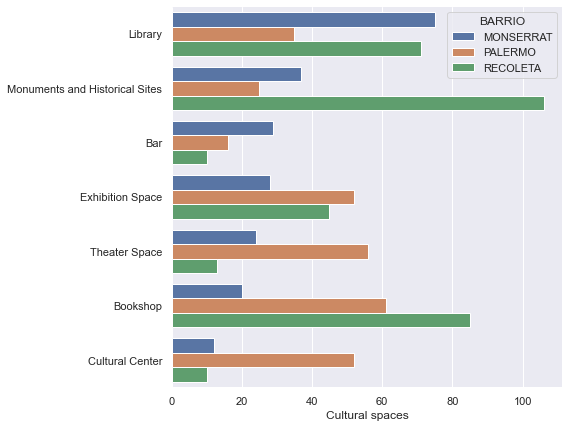

In [97]:
a=distro_data[((distro_data.BARRIO=="PALERMO") | (distro_data.BARRIO=="RECOLETA")| 
    (distro_data.BARRIO=="MONSERRAT")) & ((distro_data.FUNCION_PR =="Library")|
    (distro_data.FUNCION_PR =="Bar") | (distro_data.FUNCION_PR =="Bookshop")|
    (distro_data.FUNCION_PR =="Cultural Center") | (distro_data.FUNCION_PR =="Exhibition Space") |
    (distro_data.FUNCION_PR =="Monuments and Historical Sites") | (distro_data.FUNCION_PR =="Theater Space"))
    ]
#%%
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(y="FUNCION_PR",x="cantidad",hue="BARRIO",data=a)
ax.set(xlabel="Cultural spaces", ylabel="",title="")
sns.despine(left=True, bottom=True)
plt.savefig('svm_conf.png',bbox_inches='tight', dpi=400)

In [98]:
cluster_0.drop(["Cluster Labels","Neighborhood"],axis=1).describe(include="all")

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
count,13,13,13,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
unique,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Exhibition Space,Library,Exhibition Space,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.461538,17.923077,2.000000,1.153846,0.538462,3.923077,9.230769,19.307692,21.076923,17.846154,1.461538,11.307692,114.230769
std,NaN,NaN,NaN,8.608285,26.584650,1.914854,1.573010,0.776250,5.057363,13.534855,18.449863,27.081548,28.996684,1.941451,15.052046,123.691925
min,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000
25%,NaN,NaN,NaN,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,3.000000,1.000000,0.000000,2.000000,19.000000
50%,NaN,NaN,NaN,7.000000,4.000000,2.000000,1.000000,0.000000,1.000000,5.000000,8.000000,5.000000,6.000000,1.000000,8.000000,63.000000
75%,NaN,NaN,NaN,10.000000,20.000000,2.000000,1.000000,1.000000,5.000000,10.000000,28.000000,35.000000,24.000000,3.000000,13.000000,170.000000


In [99]:
cluster_1=neighborhoods_venues_clusters[neighborhoods_venues_clusters["Cluster Labels"]== 1]
cluster_1.insert(len(cluster_1.columns),'Sum of CE',cluster_1.sum(axis=1))
cluster_1

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
2,1,BALVANERA,Bookshop,Library,Theater Space,15,66,0,2,2,17,20,15,61,13,2,41,255
4,1,BELGRANO,Bookshop,Library,Exhibition Space,3,34,2,2,4,9,2,10,33,3,5,6,114
7,1,CABALLITO,Bookshop,Library,Theater Space,6,29,5,4,1,9,9,7,23,0,2,12,108
11,1,CONSTITUCION,Bookshop,Library,Cultural Center,3,7,0,1,0,4,4,2,6,1,1,2,32
14,1,LINIERS,Bookshop,Record Store,Comprehensive Training Space,0,4,0,0,0,3,1,0,2,0,3,0,14
17,1,MONTE CASTRO,Bookshop,Bar,Theater Space,3,3,0,1,0,1,0,0,1,0,0,2,12
29,1,SAAVEDRA,Library,Comprehensive Training Space,Bookshop,3,3,1,2,1,4,2,1,7,2,0,2,29
31,1,SAN NICOLAS,Bookshop,Library,Theater Space,28,113,2,0,4,24,15,19,104,39,23,45,417
36,1,VILLA DEL PARQUE,Library,Bookshop,Theater Space,0,5,0,1,0,1,2,1,5,0,0,2,18
37,1,VILLA DEVOTO,Bookshop,Cultural Center,Theater Space,2,7,1,1,1,2,3,0,2,0,2,2,24


In [100]:
cluster_1.sort_values(by=["Sum of CE"],ascending=False).head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
31,1,SAN NICOLAS,Bookshop,Library,Theater Space,28,113,2,0,4,24,15,19,104,39,23,45,417
2,1,BALVANERA,Bookshop,Library,Theater Space,15,66,0,2,2,17,20,15,61,13,2,41,255
4,1,BELGRANO,Bookshop,Library,Exhibition Space,3,34,2,2,4,9,2,10,33,3,5,6,114


In [101]:
cluster_1.drop(["Cluster Labels","Neighborhood"],axis=1).describe(include="all")

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
count,13,13,13,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
unique,3,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bookshop,Library,Theater Space,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.307692,22.230769,0.846154,1.230769,1.00000,5.846154,4.923077,4.461538,19.307692,4.461538,3.000000,9.076923,82.692308
std,NaN,NaN,NaN,7.930790,32.990286,1.463224,1.091928,1.47196,7.255414,6.224435,6.398117,30.898718,10.974329,6.191392,15.397302,122.256141
min,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,NaN,NaN,NaN,0.000000,3.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,14.000000
50%,NaN,NaN,NaN,3.000000,7.000000,0.000000,1.000000,0.00000,3.000000,2.000000,1.000000,5.000000,0.000000,1.000000,2.000000,29.000000
75%,NaN,NaN,NaN,6.000000,29.000000,1.000000,2.000000,1.00000,9.000000,6.000000,7.000000,23.000000,2.000000,2.000000,6.000000,108.000000


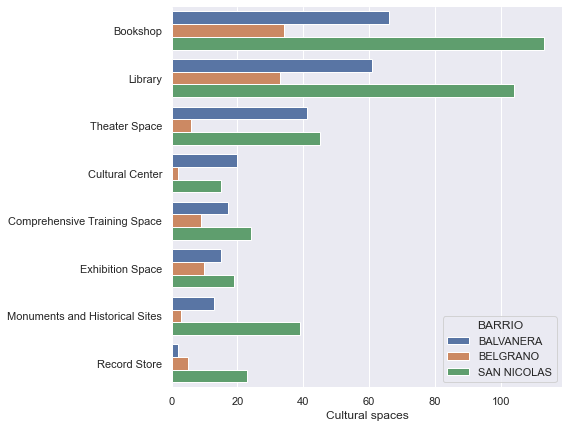

In [102]:
a=distro_data[((distro_data.BARRIO=="SAN NICOLAS") | (distro_data.BARRIO=="BALVANERA")| 
    (distro_data.BARRIO=="BELGRANO")) & ((distro_data.FUNCION_PR =="Library")|(distro_data.FUNCION_PR =="Record Store")|  
    (distro_data.FUNCION_PR =="Comprehensive Training Space") | (distro_data.FUNCION_PR =="Bookshop")|
    (distro_data.FUNCION_PR =="Cultural Center") | (distro_data.FUNCION_PR =="Exhibition Space") |
    (distro_data.FUNCION_PR =="Monuments and Historical Sites") | (distro_data.FUNCION_PR =="Theater Space"))
    ]
#%%
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(y="FUNCION_PR",x="cantidad",hue="BARRIO",data=a)
ax.set(xlabel="Cultural spaces", ylabel="",title="")
sns.despine(left=True, bottom=True)
plt.savefig('svm_conf.png',bbox_inches='tight', dpi=400)

In [103]:
cluster_2=neighborhoods_venues_clusters[neighborhoods_venues_clusters["Cluster Labels"]== 2]
cluster_2.insert(len(cluster_2.columns),'Sum of CE',cluster_2.sum(axis=1))
cluster_2

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
0,2,AGRONOMIA,Library,Cultural Center,Bar,2,1,0,0,0,0,4,1,4,0,0,0,14
1,2,ALMAGRO,Theater Space,Cultural Center,Bookshop,13,22,0,1,1,20,35,5,13,0,1,46,159
3,2,BARRACAS,Library,Cultural Center,Monuments and Historical Sites,4,4,0,2,0,6,10,4,10,8,0,4,54
6,2,BOEDO,Cultural Center,Bar,Theater Space,9,6,0,0,0,1,12,1,4,1,0,7,43
10,2,COLEGIALES,Bookshop,Cultural Center,Theater Space,3,8,0,1,0,2,7,0,4,0,0,4,31
12,2,FLORES,Theater Space,Library,Cultural Center,6,7,0,3,1,3,7,4,8,2,1,10,54
13,2,FLORESTA,Bar,Theater Space,Library,3,2,0,1,0,1,2,0,2,0,0,2,15
18,2,NUEVA POMPEYA,Bar,Library,Cultural Center,5,2,0,1,0,3,3,2,3,0,1,0,22
19,2,NUÑEZ,Library,Cultural Center,Bookshop,2,6,0,1,0,2,8,4,10,1,0,1,37
21,2,PARQUE AVELLANEDA,Bar,Library,Comprehensive Training Space,5,0,1,1,0,3,1,0,4,0,0,1,18


In [104]:
cluster_2.sort_values(by=["Sum of CE"],ascending=False).head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
1,2,ALMAGRO,Theater Space,Cultural Center,Bookshop,13,22,0,1,1,20,35,5,13,0,1,46,159
35,2,VILLA CRESPO,Theater Space,Cultural Center,Bookshop,6,14,0,0,0,10,20,12,6,1,0,32,103
3,2,BARRACAS,Library,Cultural Center,Monuments and Historical Sites,4,4,0,2,0,6,10,4,10,8,0,4,54


In [105]:
cluster_2.drop(["Cluster Labels","Neighborhood"],axis=1).describe(include="all")

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Bar,Bookshop,Carnival,Carousel,Cinema,Comprehensive Training Space,Cultural Center,Exhibition Space,Library,Monuments and Historical Sites,Record Store,Theater Space,Sum of CE
count,22,22,22,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
unique,6,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Library,Cultural Center,Bookshop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.272727,3.681818,0.090909,0.818182,0.090909,3.181818,6.136364,1.636364,4.272727,0.681818,0.181818,5.590909,31.636364
std,NaN,NaN,NaN,3.180024,5.401819,0.294245,0.795006,0.294245,4.425428,7.977919,2.820764,3.425143,1.728924,0.394771,11.308063,36.211739
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,NaN,NaN,NaN,1.250000,0.250000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,12.250000
50%,NaN,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.500000,0.500000,4.000000,0.000000,0.000000,1.500000,17.500000
75%,NaN,NaN,NaN,4.750000,5.500000,0.000000,1.000000,0.000000,3.000000,7.000000,1.750000,5.750000,1.000000,0.000000,4.000000,35.500000


In [106]:
subcategorias=cultural_spaces.groupby("BARRIO")["SUBCATEGOR"].value_counts().to_frame()
subcategorias.rename(columns={"SUBCATEGOR":"cantidad"},inplace=True)
subcategorias.reset_index(inplace=True)
subcategorias.sort_values(by=["cantidad"],ascending=False).head(30)

,BARRIO,SUBCATEGOR,cantidad
270,RECOLETA,UNIVERSITARIA Y/O CIENTIFICO TECNICA,56
323,SAN NICOLAS,ESPECIALIZADA GUBERNAMENTAL,41
3,ALMAGRO,SALA DE TEATRO,41
324,SAN NICOLAS,SALA DE TEATRO,39
206,PALERMO,GALERIA DE ARTE,39
17,BALVANERA,UNIVERSITARIA Y/O CIENTIFICO TECNICA,37
170,MONSERRAT,ESPECIALIZADA GUBERNAMENTAL,36
18,BALVANERA,SALA DE TEATRO,36
325,SAN NICOLAS,UNIVERSITARIA Y/O CIENTIFICO TECNICA,35
291,RETIRO,GALERIA DE ARTE,33


In [107]:
categorias=cultural_spaces_clean.groupby("BARRIO")["FUNCION_PR"].value_counts().to_frame()
categorias.rename(columns={"FUNCION_PR":"cantidad"},inplace=True)
categorias.reset_index(inplace=True)
categorias.sort_values(by=["cantidad"],ascending=False, inplace=True)
categorias.rename(columns={"FUNCION_PR":"Cultural Space","cantidad":"Total"}).head(10)

,BARRIO,Cultural Space,Total
276,SAN NICOLAS,Bookshop,113
233,RECOLETA,Monuments and Historical Sites,106
277,SAN NICOLAS,Library,104
234,RECOLETA,Bookshop,85
140,MONSERRAT,Library,75
235,RECOLETA,Library,71
15,BALVANERA,Bookshop,66
175,PALERMO,Bookshop,61
16,BALVANERA,Library,61
176,PALERMO,Theater Space,56


In [108]:
cultural_spaces.groupby('FUNCION_PR')['SUBCATEGOR'].value_counts()

FUNCION_PR             SUBCATEGOR                          
BAR                    CULTURAL                                 97
                       NOTABLE                                  85
                       MILONGA Y/O TANGUERIA                    65
                       PEÑA                                      2
                       MILONGA                                   1
BIBLIOTECA             UNIVERSITARIA Y/O CIENTIFICO TECNICA    258
                       ESPECIALIZADA GUBERNAMENTAL             153
                       POPULAR                                  61
                       ESPECIALIZADA EMPRESARIAL                33
                       DGLB-GCBA                                30
                       ESCOLAR                                  27
                       COMUNITARIA Y/O EXTRANJERA               13
                       ARTISTICA                                12
                       HISTORICA                                11
  

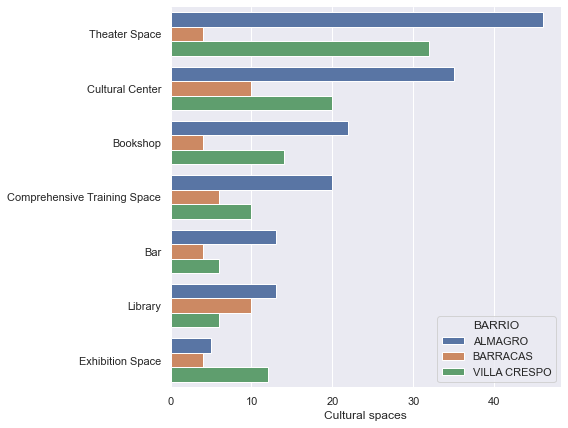

In [109]:
a=distro_data[((distro_data.BARRIO=="ALMAGRO") | (distro_data.BARRIO=="VILLA CRESPO")| 
    (distro_data.BARRIO=="BARRACAS")) & ((distro_data.FUNCION_PR =="Library")|(distro_data.FUNCION_PR =="Bar")|  
    (distro_data.FUNCION_PR =="Comprehensive Training Space") | (distro_data.FUNCION_PR =="Bookshop")|
    (distro_data.FUNCION_PR =="Cultural Center") | (distro_data.FUNCION_PR =="Exhibition Space") |
    (distro_data.FUNCION_PR =="Theater Space"))
    ]
#%%
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(y="FUNCION_PR",x="cantidad",hue="BARRIO",data=a)
ax.set(xlabel="Cultural spaces", ylabel="",title="")
sns.despine(left=True, bottom=True)
plt.savefig('svm_conf.png',bbox_inches='tight', dpi=400)